In [30]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Example Loading and Manipulating Mocks

In [31]:
## Load a mock

In [32]:
# get path to mocks
import os
cwd = os.getcwd()
data_path = os.path.abspath(os.path.join(os.path.dirname(cwd), 'mocks')) + '/'

In [33]:
from astropy.table import Table
mock = Table.read(data_path + 'mock_1a_00.hdf5', path='data')

## Plot Some Relations

Create a corner plot of most of the properties in the mock.

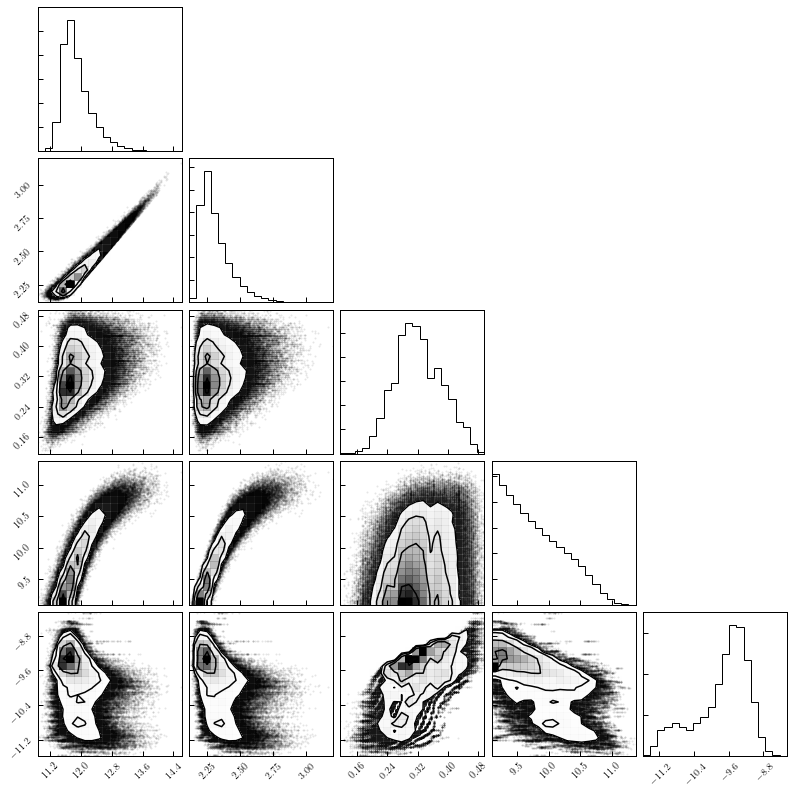

In [35]:
import corner

values = np.stack((np.log10(mock['halo_mpeak']),
                   np.log10(mock['halo_vpeak']),
                   mock['halo_halfmass_scale_factor'],
                   np.log10(mock['stellar_mass']),
                   np.log10(mock['ssfr']),
                  )).T

fig = corner.corner(values)

Examine a subset of correlations in detail.

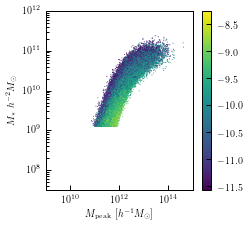

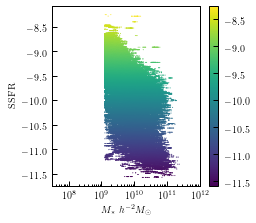

In [38]:
# plot SMHM relation
plt.figure(figsize=(3.3,3.3))
plt.scatter(mock['halo_mpeak'], mock['stellar_mass'],
            c=np.log10(mock['ssfr']), s=1, lw=0)
plt.ylabel(r'$M_{*}~h^{-2}M_{\odot}$')
plt.ylim([10**7.5,10**12.0])
plt.xlim([10**9,10**15])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M_{\rm peak}~[h^{-1}M_{\odot}]$')
plt.colorbar()
plt.show()

# plot stellar mass vs color
plt.figure(figsize=(3.3,3.3))
plt.scatter(mock['stellar_mass'], np.log10(mock['ssfr']),
            c=np.log10(mock['ssfr']), s=1, lw=0)
plt.xlabel(r'$M_{*}~h^{-2}M_{\odot}$')
plt.xlim([10**7.5,10**12.0])
plt.xscale('log')
plt.ylabel(r'SSFR')
plt.colorbar()
plt.show()

## Clustering

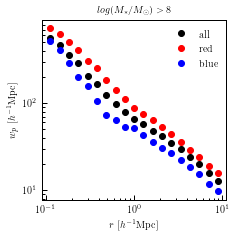

In [50]:
# calculate TPCF
from halotools.mock_observables import wp, return_xyz_formatted_array

rp_bins = np.logspace(-1,1,20)
rp_bin_centers = (rp_bins[:-1]+rp_bins[1:])/2.0

mask = (np.log10(mock['stellar_mass'])>=10)
red = np.log10(mock['ssfr'])<-10
blue = np.log10(mock['ssfr'])>-10

# get coordinates in redhsift space and in halotools mock observable format
coords =  return_xyz_formatted_array(mock['x'], mock['y'], mock['z'], velocity=mock['vz'],
                                     period=250.0, velocity_distortion_dimension='z')

# calculate for three samples
result_all = wp(coords[mask], rp_bins=rp_bins, pi_max=40.0, period=250.0)
result_red = wp(coords[red&mask], rp_bins=rp_bins, pi_max=40.0, period=250.0)
result_blue = wp(coords[blue&mask], rp_bins=rp_bins, pi_max=40.0, period=250.0)

plt.figure(figsize=(3.3,3.3))
p1, = plt.plot(rp_bin_centers, result_all, 'o', color='black')
p2, = plt.plot(rp_bin_centers, result_red, 'o', color='red')
p3, = plt.plot(rp_bin_centers, result_blue, 'o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$w_p ~ [h^{-1}{\rm Mpc}]$')
plt.xlabel(r'$r ~ [h^{-1}{\rm Mpc}]$')
plt.title(r'$log(M_*/M_{\odot}) > 8$')
plt.legend([p1,p2,p3], ['all', 'red', 'blue'], frameon=False, loc='upper right', fontsize=10, numpoints=1)
plt.show()